In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import scipy.io as sio 
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

import math
import os

In [2]:
# read paths
directory = os.listdir('../chip02/n420')
directory.sort()
print('../chip02/n420/' + directory[4])

../chip02/n420/180519_ch02v050r20d3_int671_time10000.mat


In [3]:
# read binary data
data = []
for k, v in enumerate(directory):
    data.append(sio.loadmat('../chip02/n420/' + directory[k]))

In [4]:
# prepare lists
fmax_ary = []
dfof_ary = []
wid_data = []
wid_pp = []
rtn_pp = []
rtn_pp_arr = []
df = []
for k, v in enumerate(data):
    fmax_ary.append(np.array([]))
    dfof_ary.append(np.array([]))

In [5]:
# Extract WID and RTN data
for k, v in enumerate(data):    
    for key, value in data[k].items():
        if key[0] == '_':
            continue
        fmax_ary[k] = np.append(fmax_ary[k], value.max())
        dfof_ary[k] = np.append(dfof_ary[k], (value.max() - value.min()) / value.max())
    wid_data.append((fmax_ary[k] - fmax_ary[k].mean()) / fmax_ary[k].mean() * 100)
    wid_pp.append(stats.probplot(wid_data[k]))
    # wid_pp.append(stats.probplot(fmax_ary[k]))
    rtn_pp.append(stats.probplot(dfof_ary[k]))
    dfof_ary[k].sort()
    print(np.corrcoef(wid_data[k], dfof_ary[k]))
    rtn_pp_arr.append(np.c_[rtn_pp[k][0][1], rtn_pp[k][0][0]])
    df.append(pd.DataFrame(rtn_pp_arr[k]))

[[ 1.         -0.04162764]
 [-0.04162764  1.        ]]
[[ 1.          0.01408301]
 [ 0.01408301  1.        ]]
[[ 1.          0.02269213]
 [ 0.02269213  1.        ]]
[[ 1.         -0.05859506]
 [-0.05859506  1.        ]]
[[ 1.         -0.08522557]
 [-0.08522557  1.        ]]


In [8]:
fig, ax = plt.subplots()
plt.title("QQ-plot for N = 420")
plt.xscale("log")
df[0].plot.scatter(0,1, s=20, label='P=140', ax=ax, color='blue',edgecolors='blue')
df[1].plot.scatter(0,1, s=20, label='P=280', ax=ax, color='red',edgecolors='red')
df[2].plot.scatter(0,1, s=20, label='P=560', ax=ax, color='green',edgecolors='green')
df[3].plot.scatter(0,1, s=20, label='P=1120', ax=ax, color='orange',edgecolors='orange')
df[4].plot.scatter(0,1, s=20, label='P=2240', ax=ax, color='black',edgecolors='black', figsize=(20,20))
plt.xlabel(r'$\Delta$' + 'F / Fmax')
plt.xlim([0.002, 0.04])
plt.ylabel("Normal theoretical quantile")

# annotation
for k, v in df[0].iterrows():
    print((v[0],v[1]))
    ax.annotate(k,xy=(v[0],v[1]),size=5, fontsize=20, color='blue')

# plt.show()
plt.savefig("./hoge.pdf")

(0.0058778379251838214, -2.9057205779858113)
(0.0069788343936696027, -2.6161200319385594)
(0.0070388583550284383, -2.4526853729984324)
(0.0070503254828177715, -2.3364974357003483)
(0.0071975436637690638, -2.2452633358284486)
(0.007270869360163499, -2.1696003684056122)
(0.007273966014748447, -2.1046356645508237)
(0.0073200229148543483, -2.0475008263269987)
(0.0073814082110191994, -1.9963592135668882)
(0.007388126939633601, -1.949961246907653)
(0.0074423993939123018, -1.9074167707836878)
(0.0074682017970360117, -1.8680683781351775)
(0.0075875521196828192, -1.8314162228558635)
(0.007743955183919053, -1.7970710378507941)
(0.0078188464662873394, -1.7647235177121909)
(0.0078338945005609669, -1.7341236546786902)
(0.0079618521555257869, -1.7050663723094988)
(0.008051563820794673, -1.6773812800125214)
(0.0080546075085323795, -1.6509252031619379)
(0.0080886267764264368, -1.6255766303928119)
(0.008161373528937442, -1.6012315147842011)
(0.008219295062018437, -1.5778000500800149)
(0.008267203076991

# Note for shaping data
## 20180607 Kanbayashi

In [17]:
type(rtn_pp[0][1])

numpy.ndarray

In [20]:
rtn_pp[0][0].shape

(378,)

In [21]:
df = pd.DataFrame({'x':rtn_pp[0][0], 'y':rtn_pp[0][1]})

In [22]:
df

,x,y
0,-2.905721,0.008045
1,-2.616120,0.009056
2,-2.452685,0.009487
3,-2.336497,0.009493
4,-2.245263,0.009498
5,-2.169600,0.009499
6,-2.104636,0.009517
7,-2.047501,0.009822
8,-1.996359,0.009978
9,-1.949961,0.010004


In [23]:
df = pd.DataFrame({'y':rtn_pp[0][0], 'x':rtn_pp[0][1]})

In [24]:
df

,x,y
0,0.008045,-2.905721
1,0.009056,-2.616120
2,0.009487,-2.452685
3,0.009493,-2.336497
4,0.009498,-2.245263
5,0.009499,-2.169600
6,0.009517,-2.104636
7,0.009822,-2.047501
8,0.009978,-1.996359
9,0.010004,-1.949961


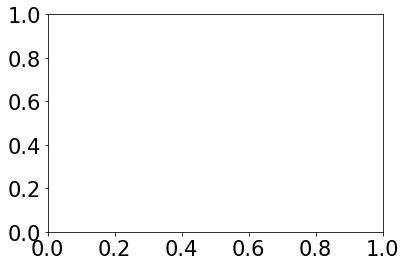

In [25]:
fig, ax = plt.subplots()

In [26]:
df.plot('x','y',kind='scatter',ax=ax)

In [27]:
for k, v in df.iterrows():
    ax.annotate(k,xy=(v['x'],v['y']),size=1)

In [29]:
plt.show()

In [31]:
%matplotlib inline

In [32]:
df.plot('x','y',kind='scatter',ax=ax)

In [33]:
plt.show()

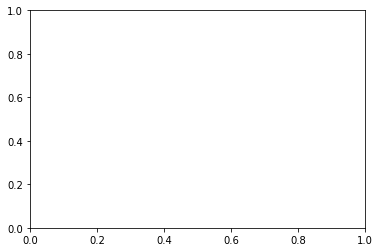

In [34]:
fig, ax = plt.subplots()

In [35]:
plt.show()

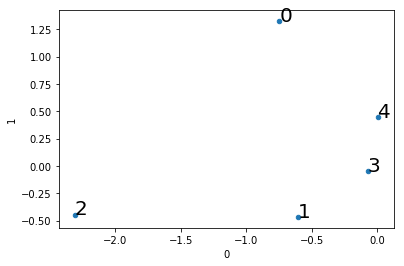

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(5,2))

fig, ax = plt.subplots()
df.plot(0,1,kind='scatter',ax=ax)

for k, v in df.iterrows():
             ax.annotate(k,xy=(v[0],v[1]),size=20)

plt.show()

In [40]:
np.random.randn(5,2)

array([[ 0.32424621, -0.15262408],
       [ 0.27052373, -0.10665128],
       [ 1.56140217,  0.90540351],
       [ 0.51892174, -0.77419556],
       [ 1.26488018,  1.59061075]])

In [41]:
df = pd.DataFrame({'y':rtn_pp[0][0], 'x':rtn_pp[0][1]})

In [42]:
array = np.c_[rtn_pp[0][0], rtn_pp[0][1]]

In [44]:
array = np.c_[rtn_pp[0][1], rtn_pp[0][0]]

In [45]:
df = pd.DataFrame(array)

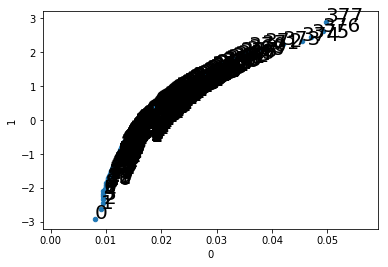

In [46]:
fig, ax = plt.subplots()
df.plot(0,1,kind='scatter',ax=ax)

for k, v in df.iterrows():
             ax.annotate(k,xy=(v[0],v[1]),size=20)

plt.show()